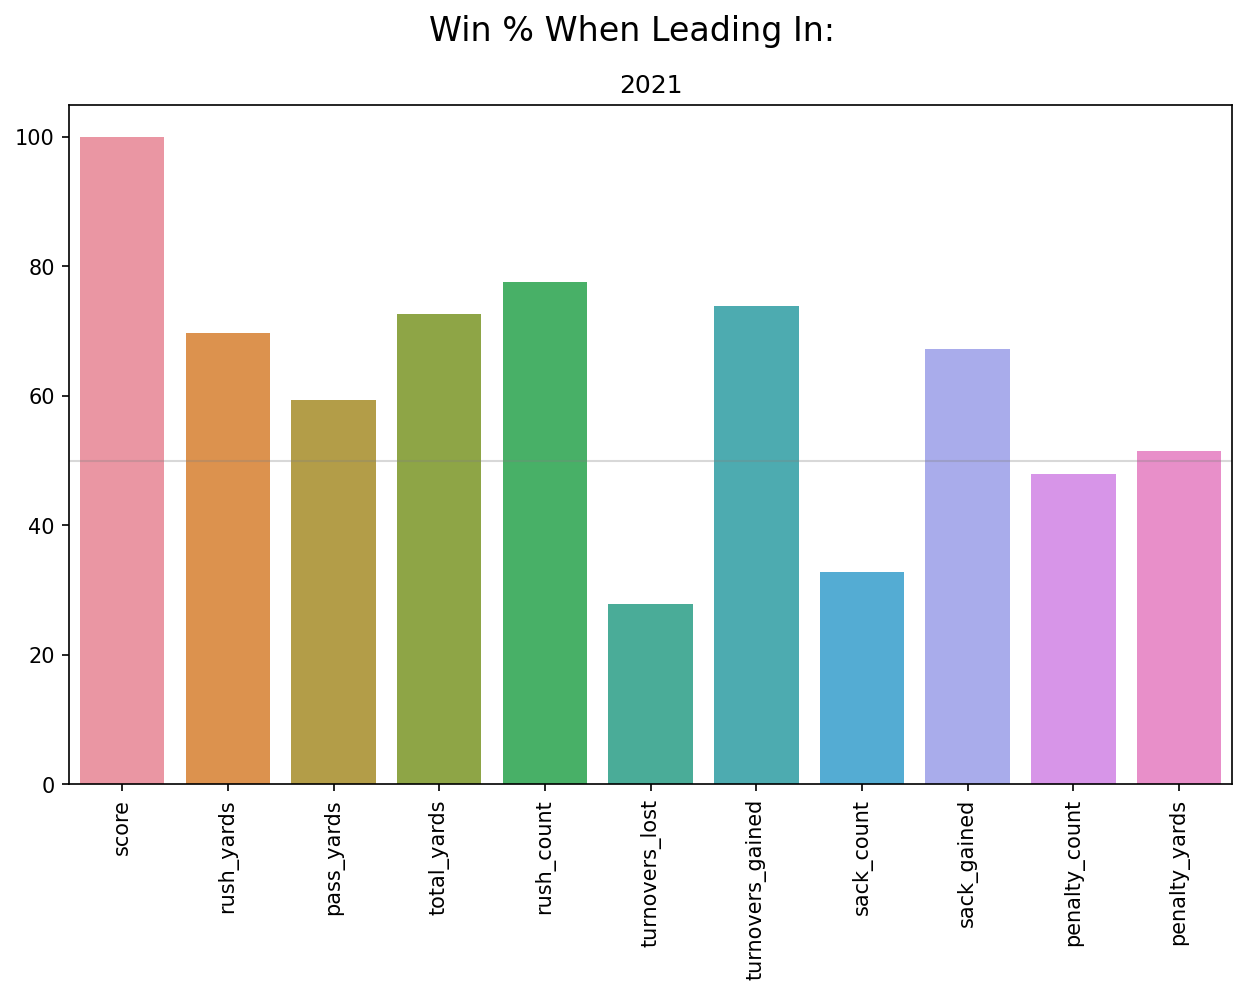

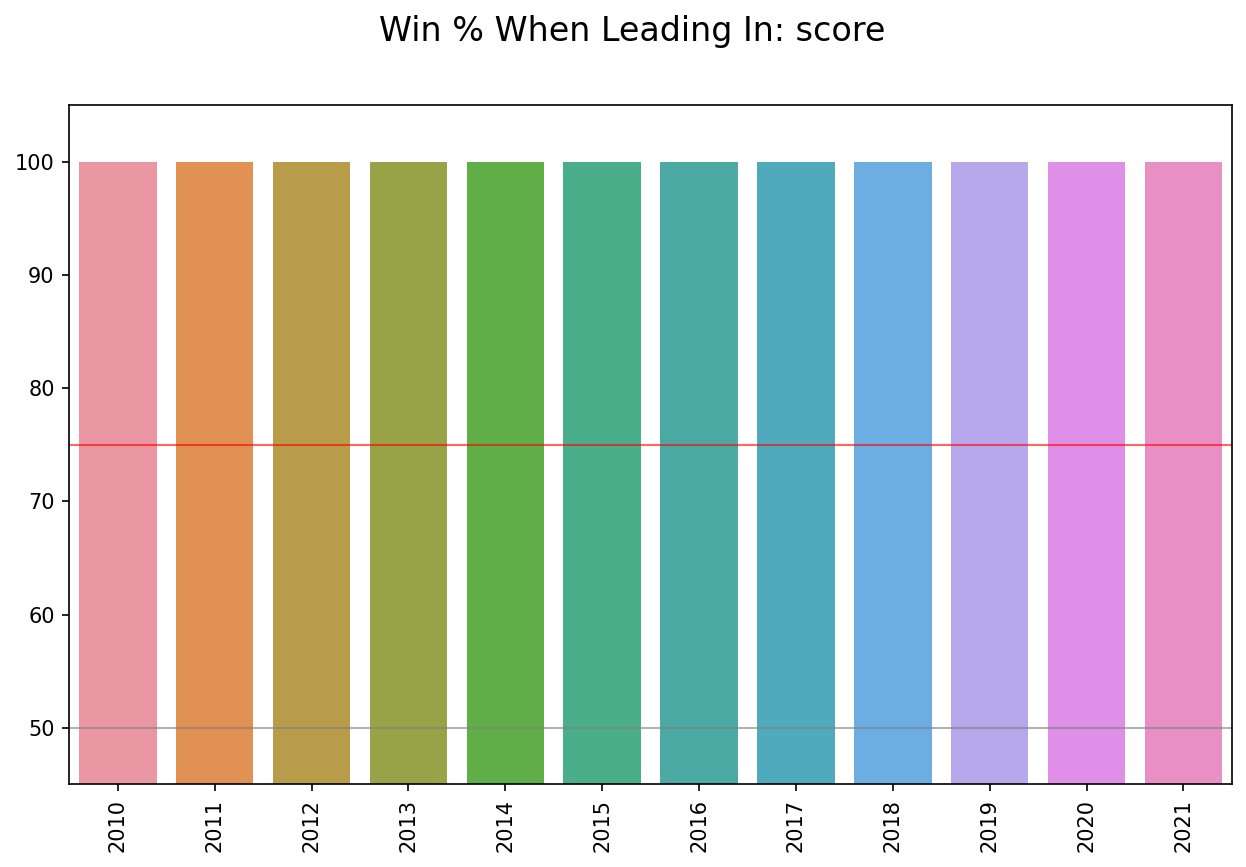

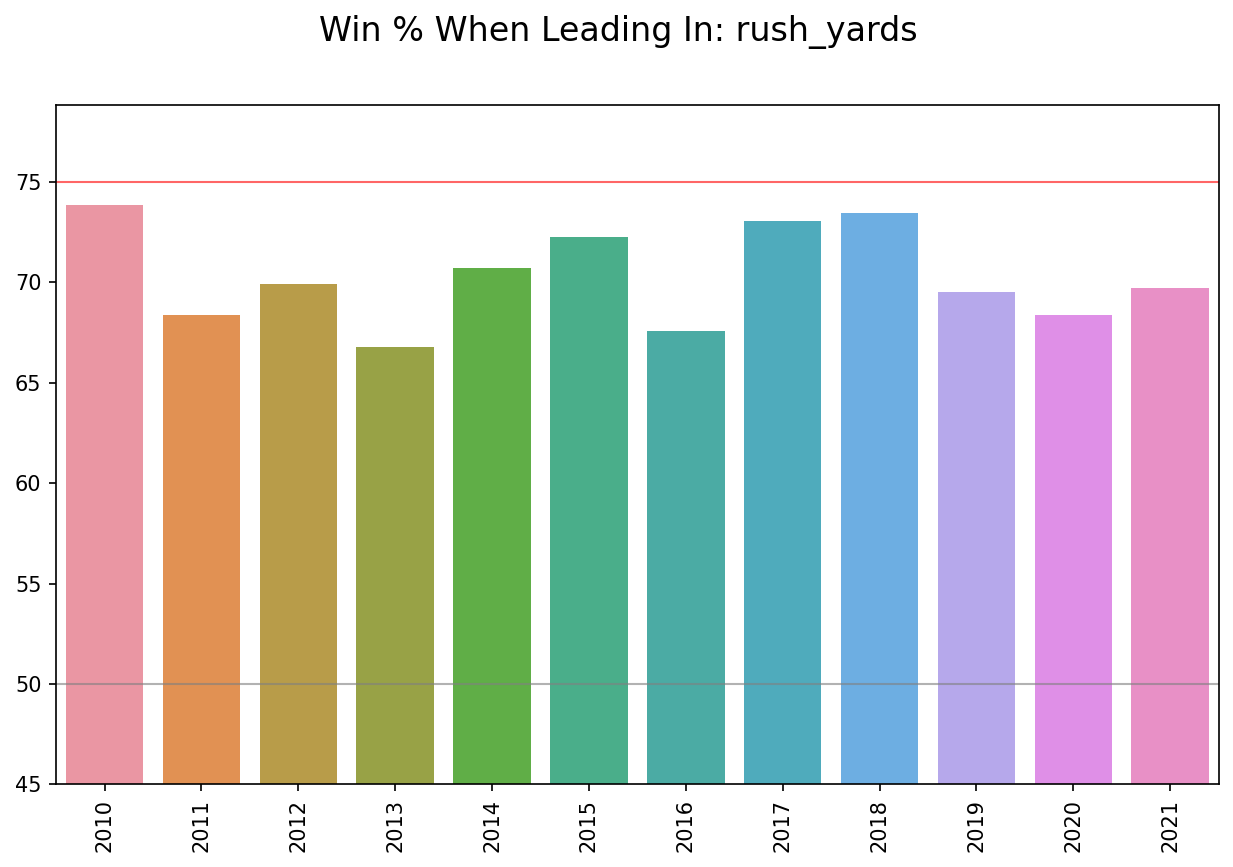

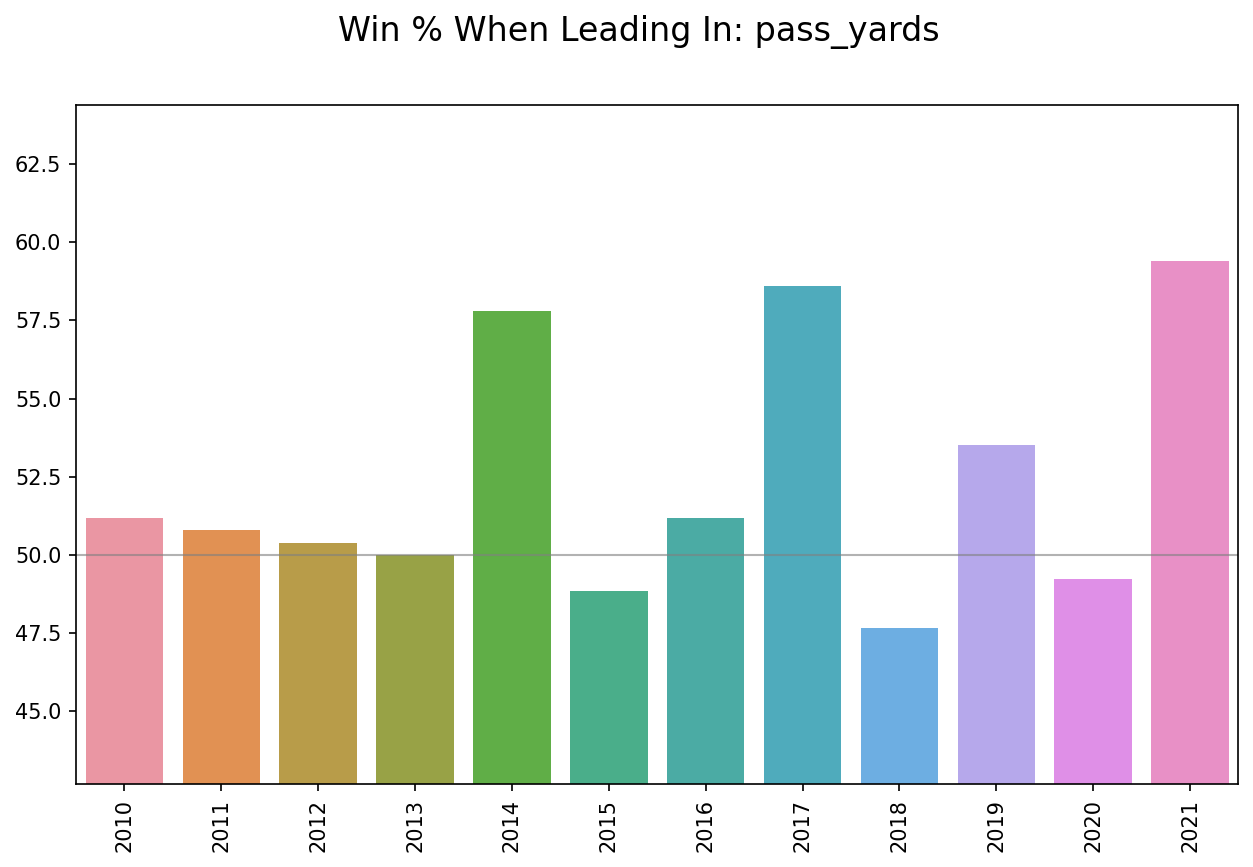

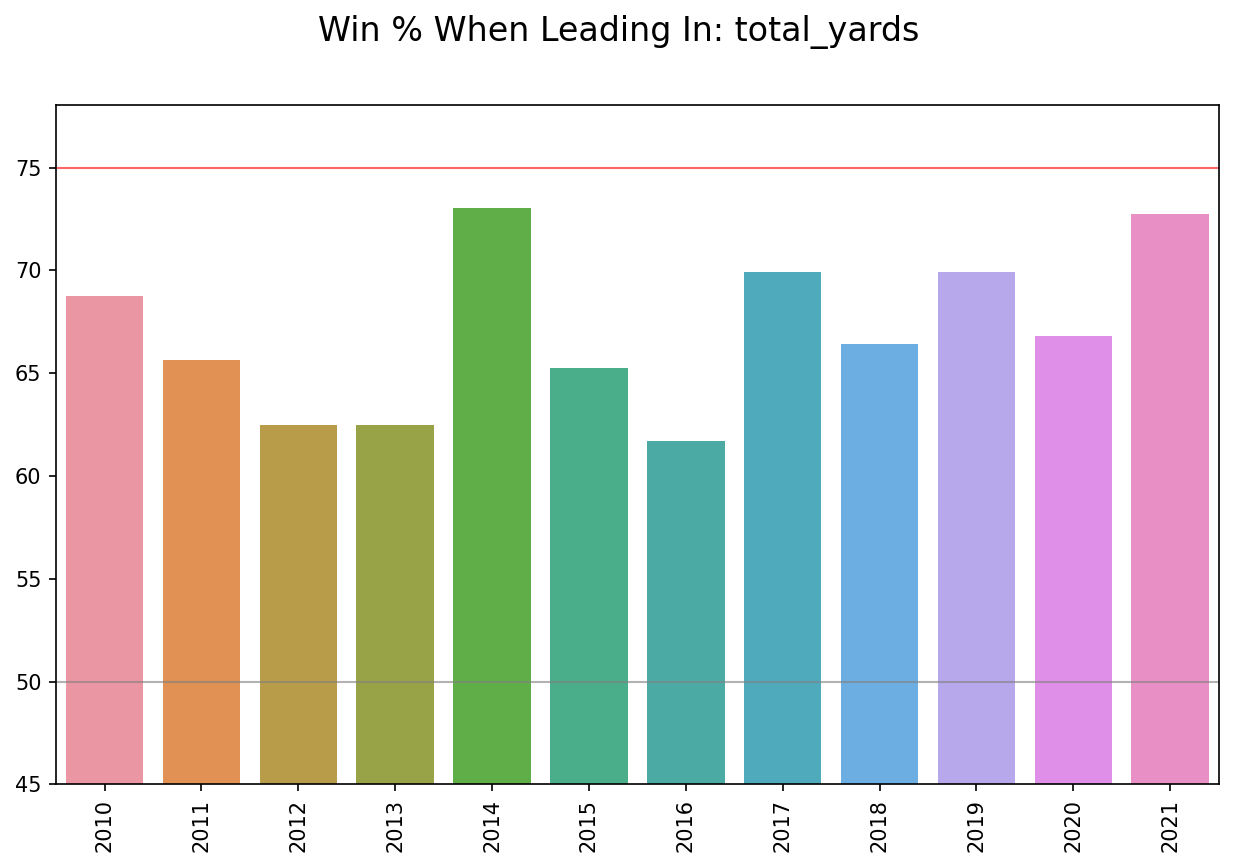

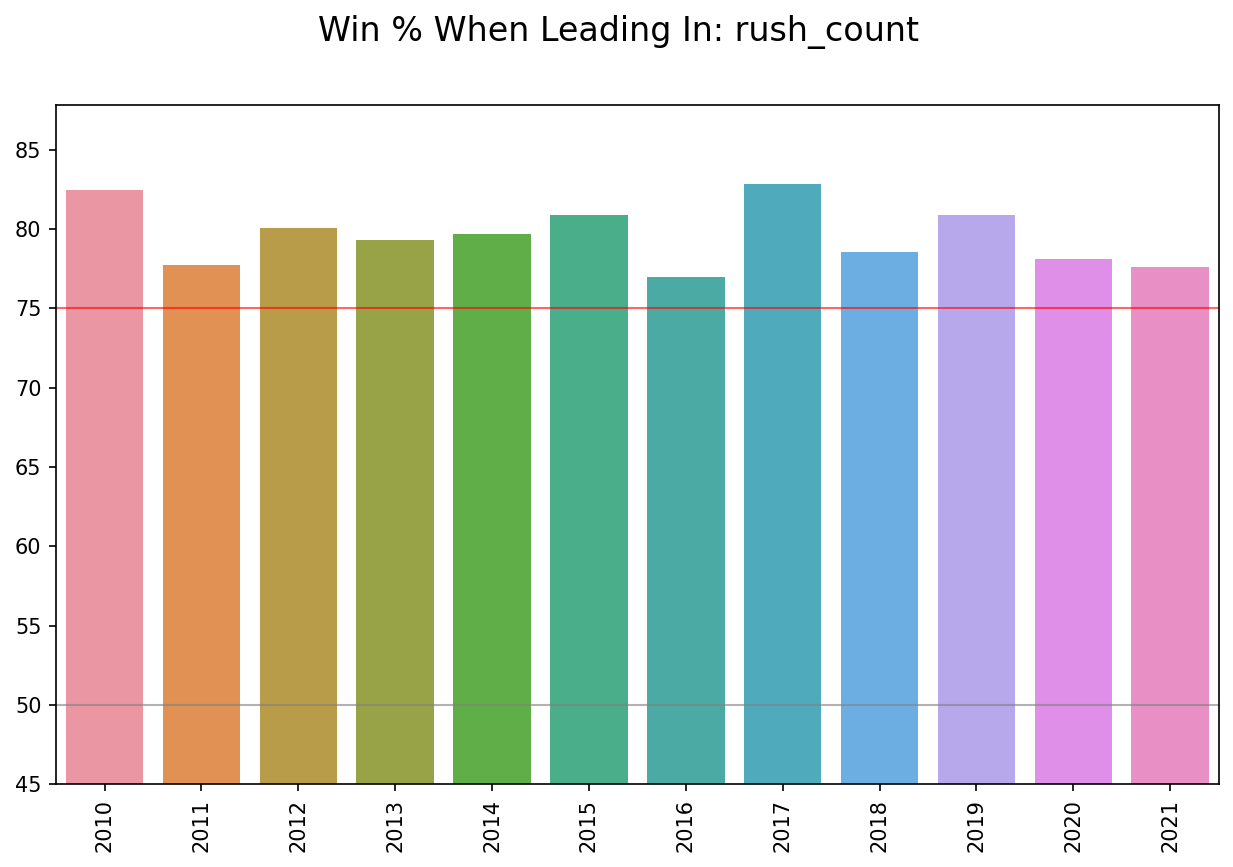

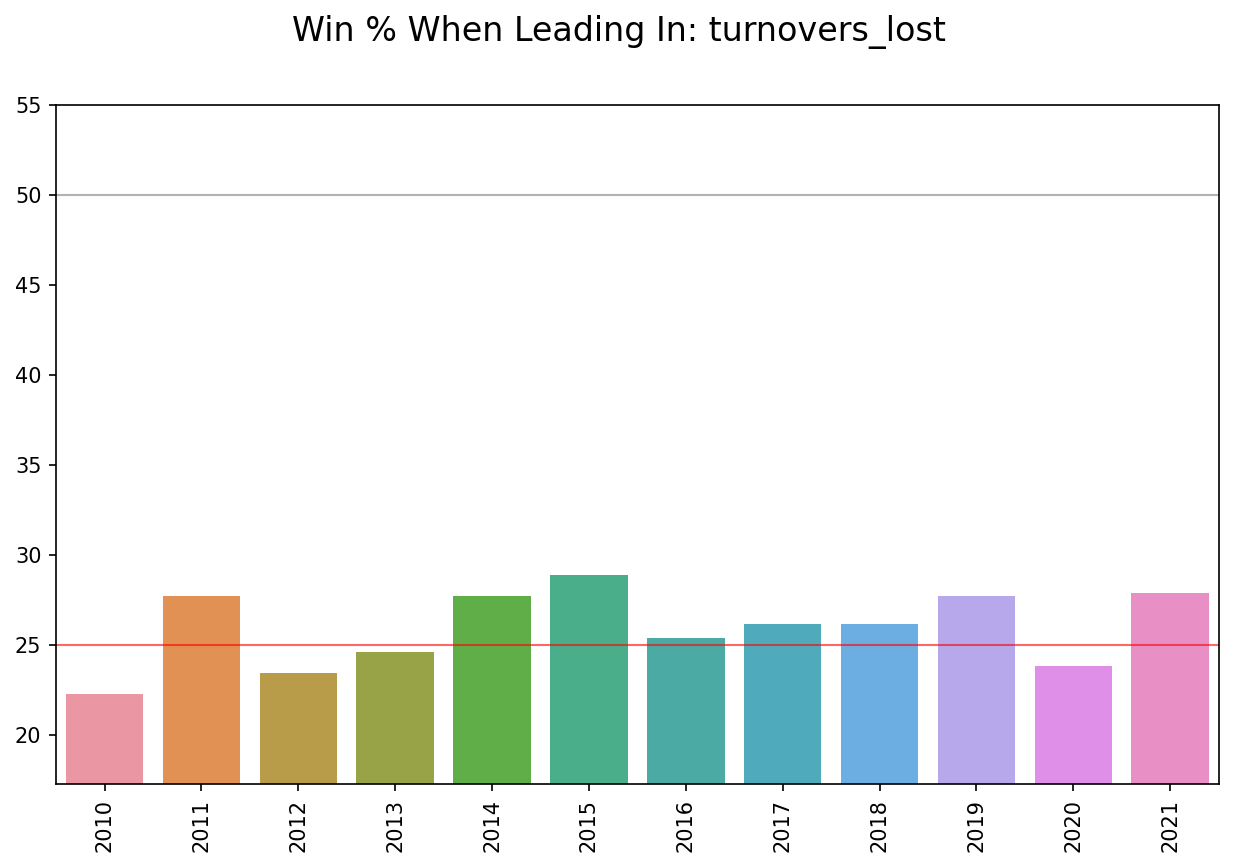

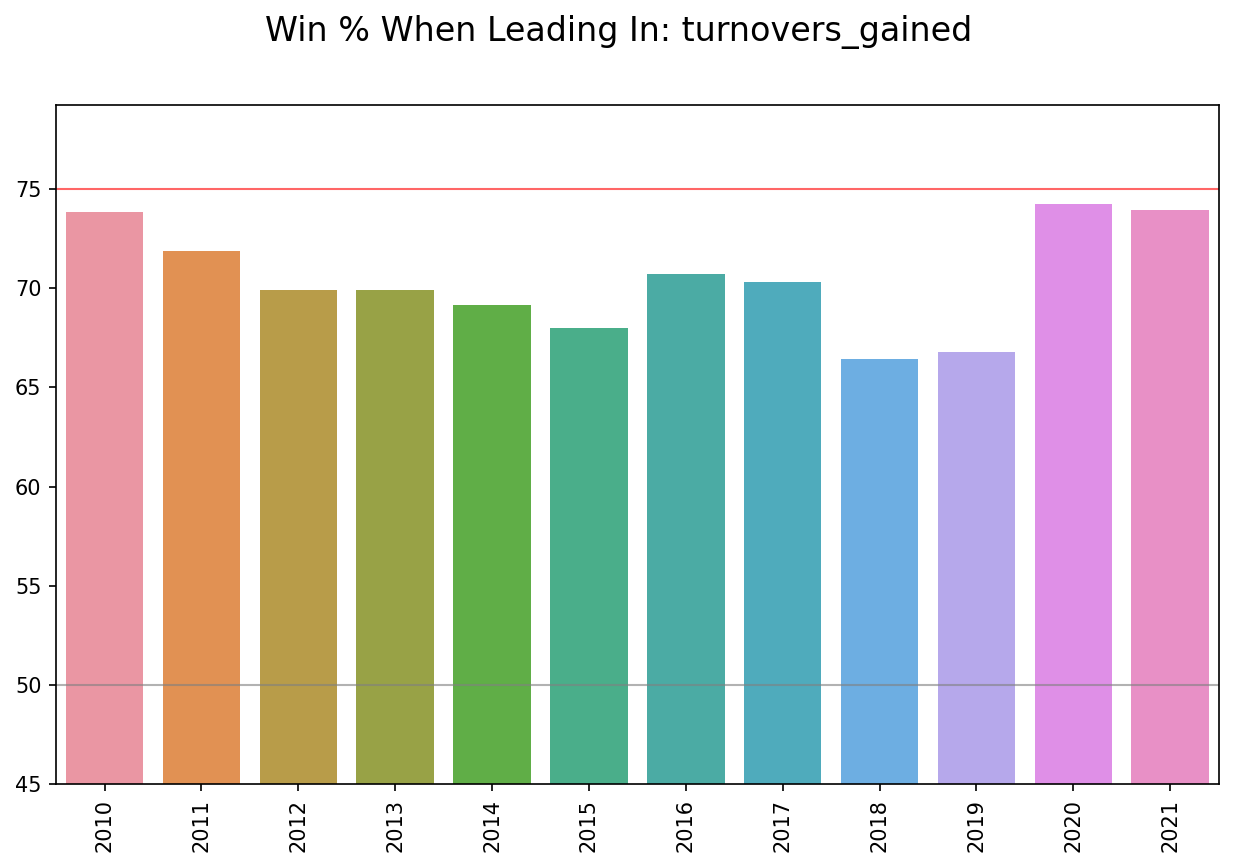

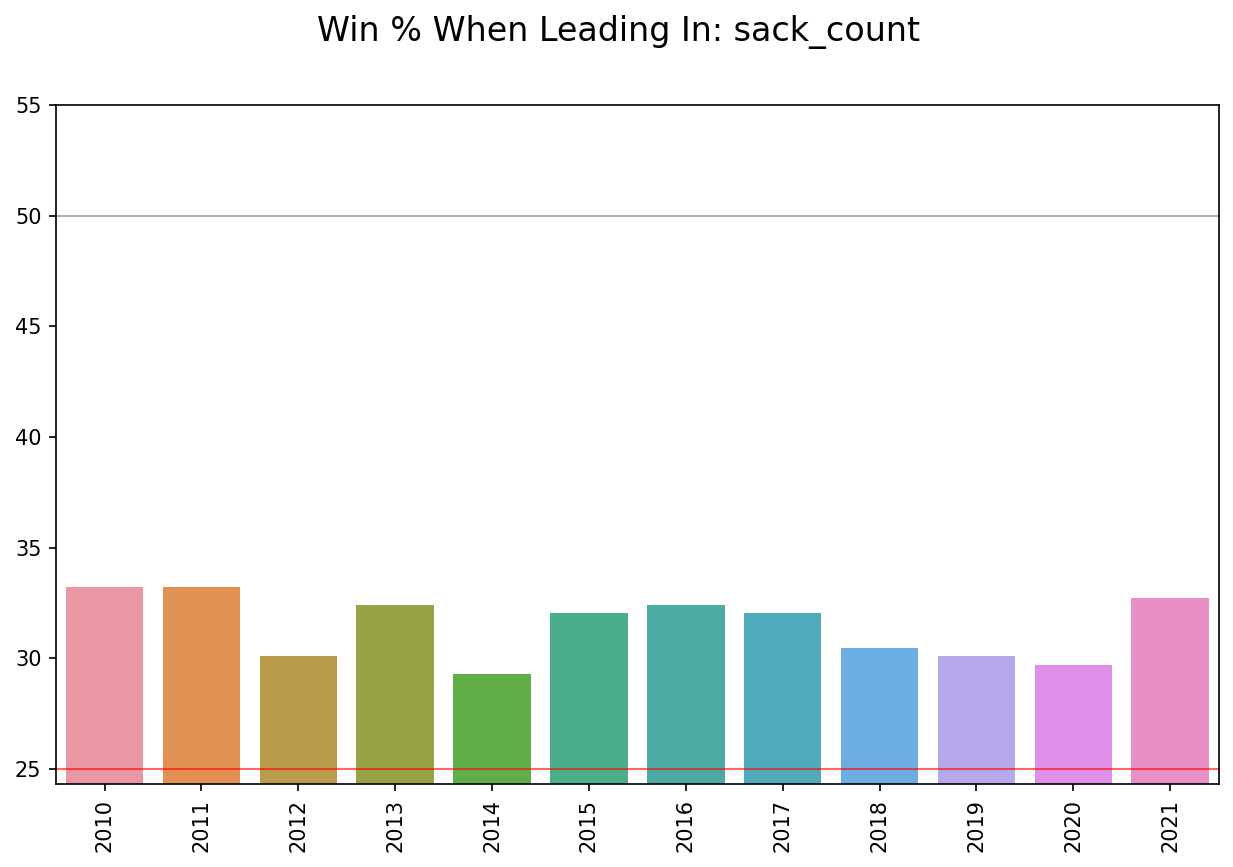

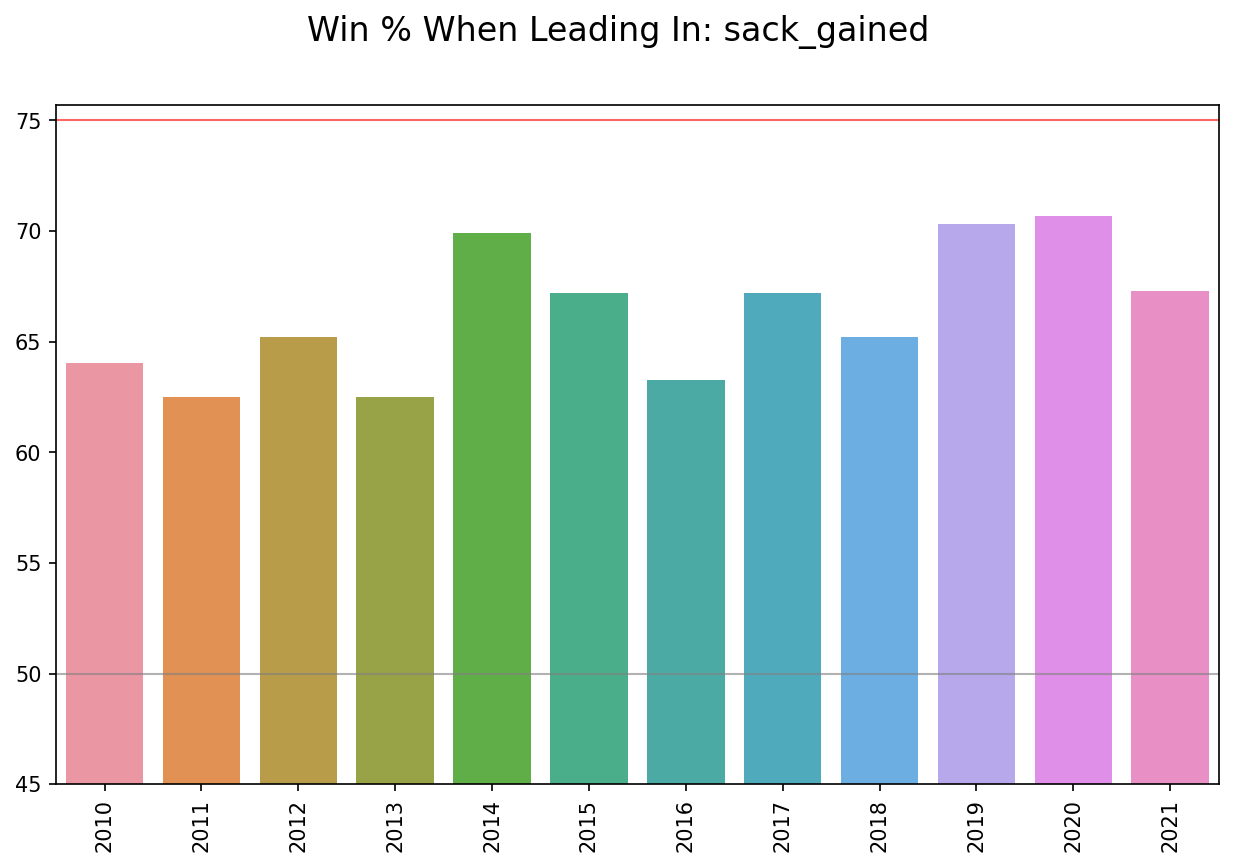

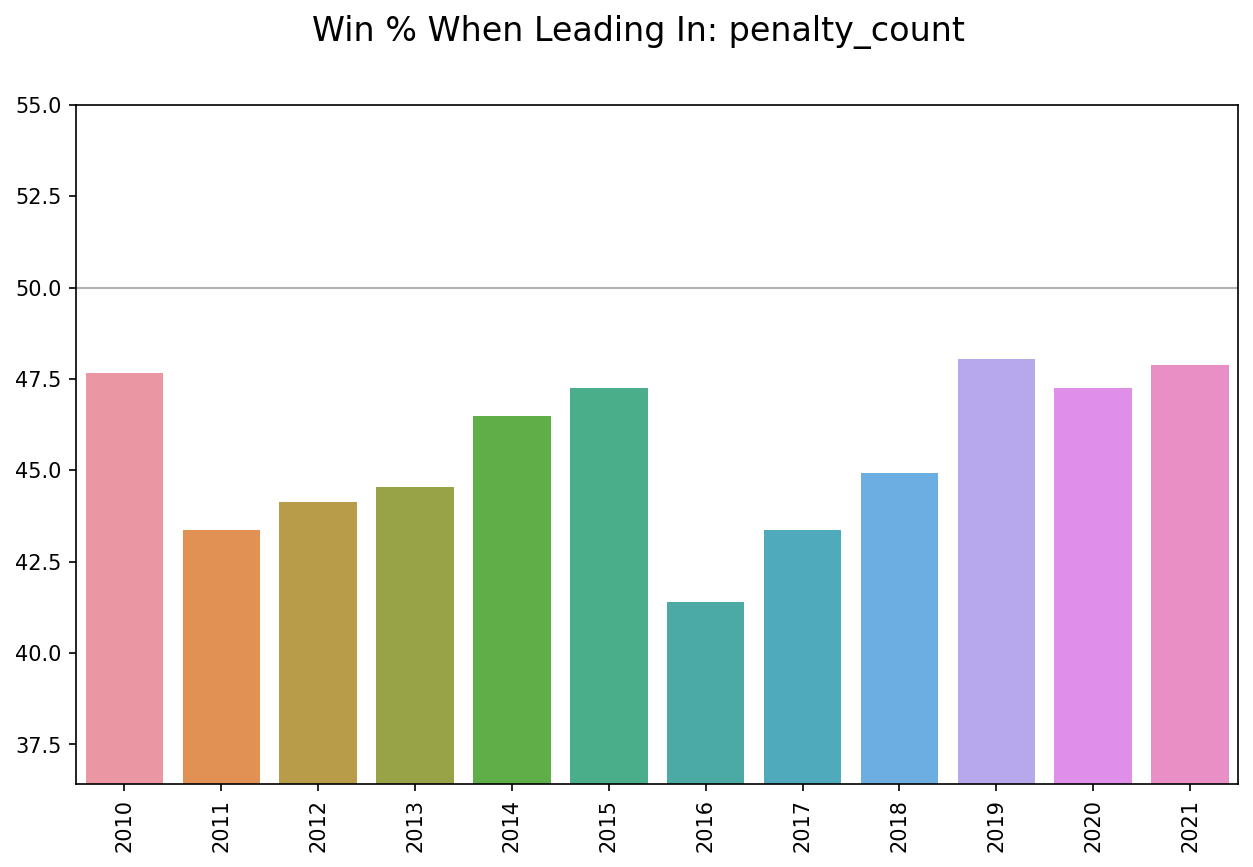

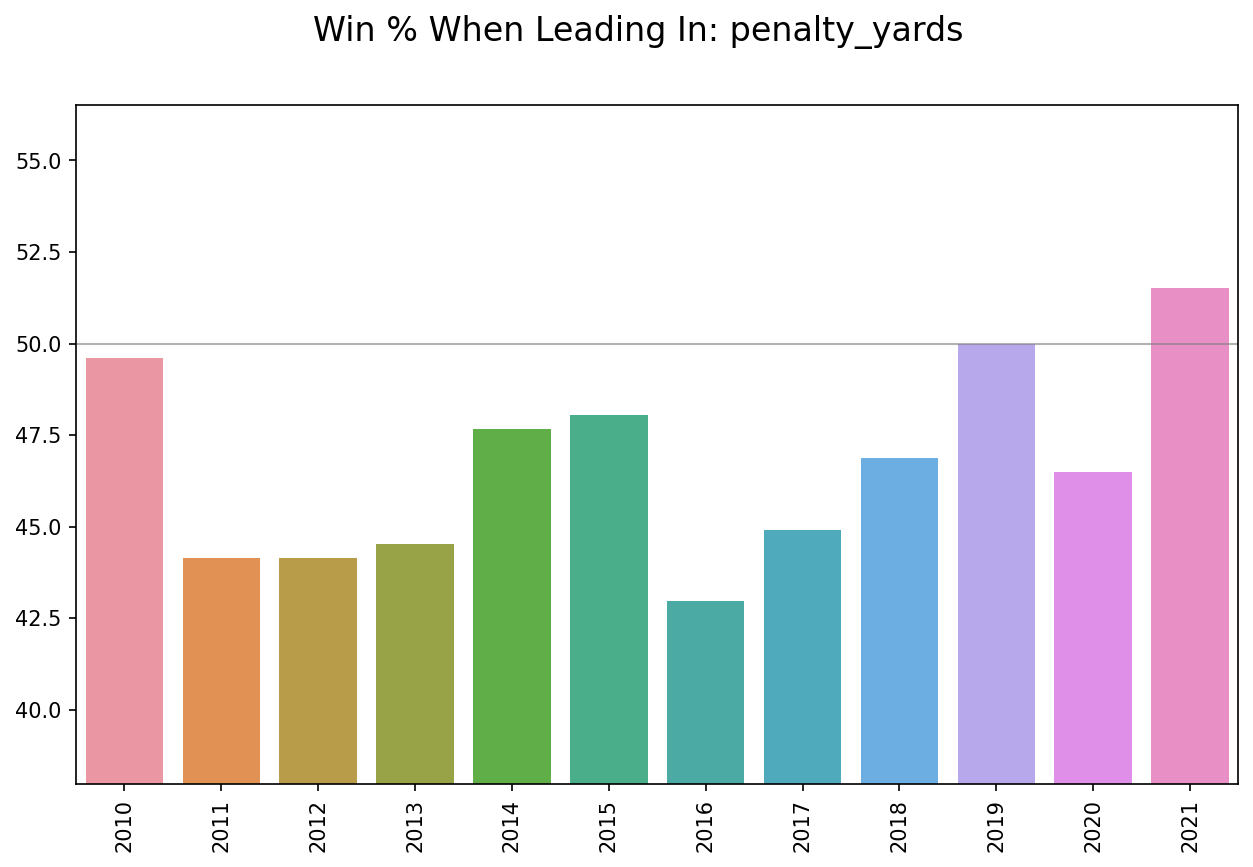

In [3]:
import utils.game_utils as gu

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

DATA_PATH = '../../data'
nfld = gu.NFL_Data(DATA_PATH)

def get_perc_winning_team_lead_field(df, field):
  '''
  Given a df and a field, return the percentage of times the 
  winning team lead in that field.
  
  If there is a '!' in the field name the invert the 
  logic
  '''
  if field.startswith('!'):
    field = field.replace('!','')
    wins_df = df[
        ((df['win'] == 1) & (df[f'team_{field}'] <= df[f'opponent_{field}']))|
        ((df['win'] == 0) & (df[f'team_{field}'] > df[f'opponent_{field}']))
      ]
  else:
    wins_df = df[
        ((df['win'] == 1) & (df[f'team_{field}'] > df[f'opponent_{field}']))|
        ((df['win'] == 0) & (df[f'team_{field}'] <= df[f'opponent_{field}']))
      ]

  return (len(wins_df) / len(df)) * 100
def work_fields_by_year(df, fields):
  for field in fields:
    data = {}
    
    for year in df['year'].unique():
      data[year] = get_perc_winning_team_lead_field(df[df['year'] == year], field)

    for item in data: data[item] = [data[item]]
    pdf = pd.DataFrame(data)
    # sort the columns
    # pdf = pdf.T.sort_values(by=0).T
    ymin = min(45, pdf.T.min()[0] - 5)
    ymax = max(55, pdf.T.max()[0] + 5)
    plt.figure(figsize=(10,6), dpi=150)
    sns.barplot(data=pdf)
    plt.ylim(ymin, ymax)
    plt.xticks(rotation=90);
    plt.suptitle(f'Win % When Leading In: {field}', fontsize=16)
    plt.axhline(y=50, color='gray', linestyle='-', lw=1, alpha=0.6)
    plt.axhline(y=75, color='red', linestyle='-', lw=1, alpha=0.6)
    plt.axhline(y=25, color='red', linestyle='-', lw=1, alpha=0.6)
def work_fields(df, fields):
  data = {}
  for field in fields:
    data[field] = get_perc_winning_team_lead_field(df, field)

  for item in data: data[item] = [data[item]]
  pdf = pd.DataFrame(data)
  # sort the columns
  # pdf = pdf.T.sort_values(by=0).T
  ymin = min(45, pdf.T.min()[0] - 5)
  ymax = max(55, pdf.T.max()[0] + 5)
  min_year = df['year'].min()
  max_year = df['year'].max()
  plt.figure(figsize=(10,6), dpi=150)
  sns.barplot(data=pdf)
  # plt.ylim(ymin, ymax)
  plt.xticks(rotation=90);
  plt.suptitle('Win % When Leading In:', fontsize=16)
  if min_year == max_year:
    plt.title(f'{min_year}')
  else:
    plt.title(f'{min_year} - {max_year}')
  plt.axhline(y=50, color='gray', linestyle='-', lw=1, alpha=0.3)
  # plt.axhline(y=75, color='gray', linestyle='-', lw=1, alpha=0.3)
  # plt.axhline(y=25, color='gray', linestyle='-', lw=1, alpha=0.3)

fields = [
    'score',
    'rush_yards',
    'pass_yards', 
    'total_yards', 
    'rush_count',
    'turnovers_lost',
    'turnovers_gained',
    'sack_count',
    'sack_gained',
    'penalty_count',
    'penalty_yards',
  ]
games_df = nfld.data_by_game()
work_fields(gu.get_year(games_df, 2021), fields)
work_fields_by_year(games_df, fields)